In [2]:
import json

with open("./data/turn_times.json") as f:
    turn_times = json.load(f)
    
with open("./data/game_results.json") as f:
    game_results = json.load(f)
    
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib
from matplotlib.pyplot import cm
import numpy

Average time (ms), min_max_1: 0.6161
Average time (ms), min_max_2: 2.1457
Average time (ms), min_max_3: 11.5090
Average time (ms), min_max_4: 192.0456
Average time (ms), random: 0.0369
Average time (ms), min_max_alpha_beta_3: 4.1349
Average time (ms), min_max_alpha_beta_4: 30.8157
Average time (ms), min_max_alpha_beta_5: 149.0669


Text(0.5,1,'AI turn time')

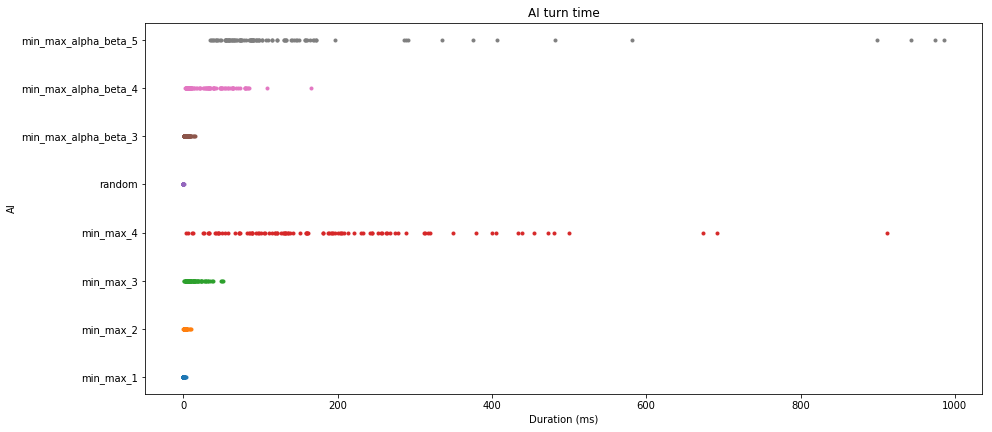

In [3]:
plt.subplots(figsize=(15,15))
plt.subplot(2, 1, 1)

for ai, times in turn_times.items():
    if ai == 'min_max_alpha_beta_6':
        continue
    print("Average time (ms), {}: {:.4f}".format(ai, numpy.mean(times)/1000000))
    x_plots = []
    y_plots = []
    for time in times:
        x_plots.append(time/1000000)
        y_plots.append(ai)
    plt.plot(x_plots, y_plots, linestyle='', marker='.')
plt.xlabel('Duration (ms)')
plt.ylabel('AI')
plt.title('AI turn time')


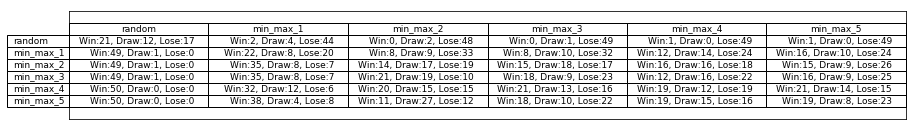

In [34]:
with open("./data/all_v_all.json") as f:
    all_v_all = json.load(f)

fig, ax = plt.subplots(figsize=(15,2))

# Hide axes
ax.xaxis.set_visible(False) 
ax.yaxis.set_visible(False)
collabel = []
data = []
for name, opponents in all_v_all.items():
    collabel.append(name)
    data_col = []
    for result in opponents.values():
        data_col.append("Win:" + str(result["win"]) + ", Draw:" + str(result["draw"]) + ", Lose:" + str(result["lose"]))
    data.append(data_col)
ax.table(cellText=data,colLabels=collabel,rowLabels=collabel,loc='center')

In [ ]:
Results are from the perpective of the row.
"winner" is the row label,  loser is column label
winner/row-label is always white and moves first
So (2,1) is random vs min_max_alpha_beta_1 is: Wins 2, Draw: 4, Lose: 44,  with random losing 44 times. 

P-values:


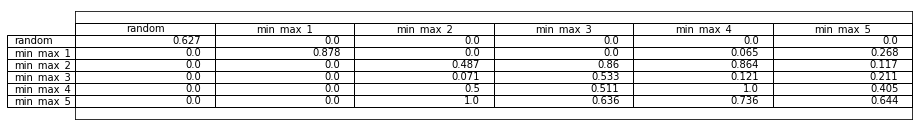

In [44]:
fig, ax = plt.subplots(figsize=(15,2))
from scipy import stats
# Hide axes
print("P-values:")
ax.xaxis.set_visible(False) 
ax.yaxis.set_visible(False)
collabel = []
data = []
for name, opponents in all_v_all.items():
    collabel.append(name)
    data_col = []
    for result in opponents.values():
        p_value = stats.binom_test(result["win"], result["win"] + result["lose"])
        data_col.append(round(p_value,  3))
    data.append(data_col)
ax.table(cellText=data,colLabels=collabel,rowLabels=collabel,loc='center')